- import


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

- load data

In [59]:
df = pd.read_csv("CardioShieldDataSet.csv")

- data analysis

In [60]:
df=df.drop('id',axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [62]:
print(df.isnull().sum())
print(df.duplicated().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
24


In [63]:
df.shape

(70000, 12)

In [64]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# data cleaning
def clean_data(df):
    df = df[(df['ap_hi'] > 70) & (df['ap_hi'] < 180) & 
            (df['ap_lo'] > 40) & (df['ap_lo'] < 120) & (df['ap_hi'] > df['ap_lo'])]
    # IQR for height/weight
    for col in ['height', 'weight']:
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    return df

df = clean_data(df)

In [66]:
def summarize_by_cardio(df, feature):
    summary = df.groupby('cardio')[feature].agg(
        min_value='min',
        Q1=lambda x: x.quantile(0.25),
        median='median',
        mean='mean',
        Q3=lambda x: x.quantile(0.75),
        max_value='max',
        std_dev='std'
    ).reset_index()
    
    return summary

In [67]:
df=df.dropna()

# data preprocessing and feature analysis

## -  age 

In [68]:
# converting age into years
df['age']=df['age']/365.25
df['age']=df['age'].astype(int)

In [69]:
df=df[df['age'] > 35].reset_index(drop=True)

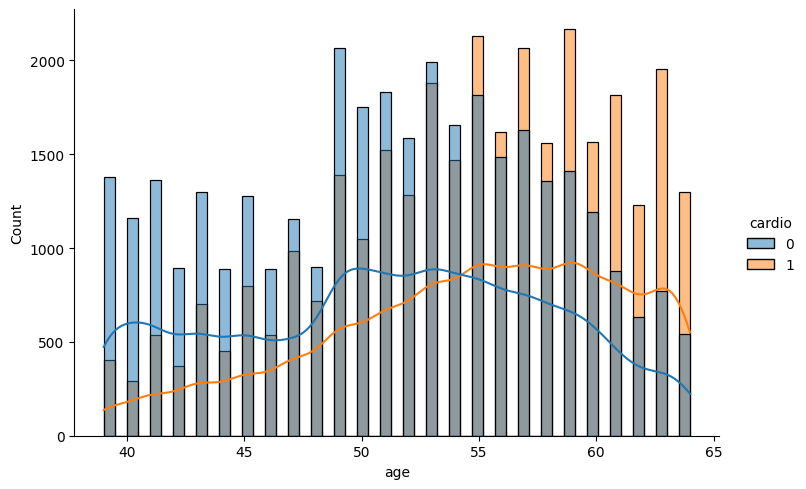

In [70]:
sns.displot(
    data=df,
    x='age',
    hue='cardio',
    kde=True,
    height=5,
    aspect=1.5
)

In [71]:
summarize_by_cardio(df, 'age')

,cardio,min_value,Q1,median,mean,Q3,max_value,std_dev
0,0,39,46.0,52.0,51.167599,56.0,64,6.767577
1,1,39,50.0,55.0,54.454485,59.0,64,6.343992


### Interpretation
- People with cardiovascular disease tend to be older than those without (~3 years difference in median).

- Age appears to be a strong factor in cardiovascular risk, which aligns with medical knowledge.

- The interquartile range (Q1–Q3) is also higher for people with cardio (50–59 vs 46–56), showing a shift in the age distribution.

## - gender

In [72]:
df.groupby('gender')['cardio'].value_counts()
# Cardiovascular disease is almost equally distributed between genders in this dataset.
# Slightly higher proportion in females, but the difference is marginal (~0.5%).

gender  cardio
1       0         22199
        1         20804
2       0         11596
        1         10988
Name: count, dtype: int64

- weight /height

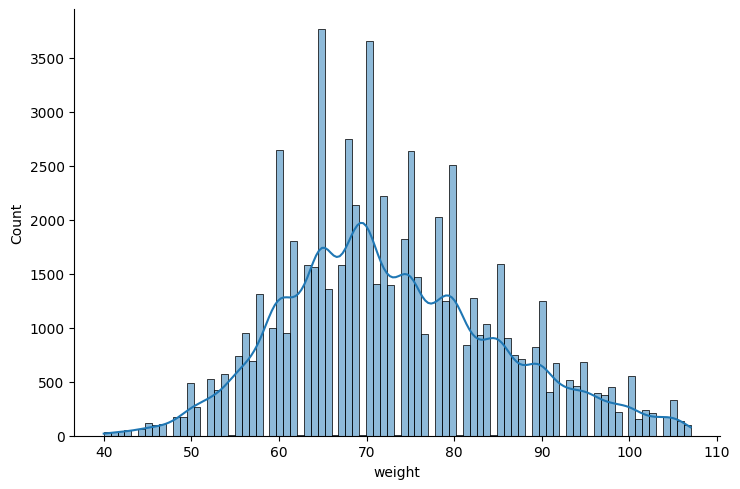

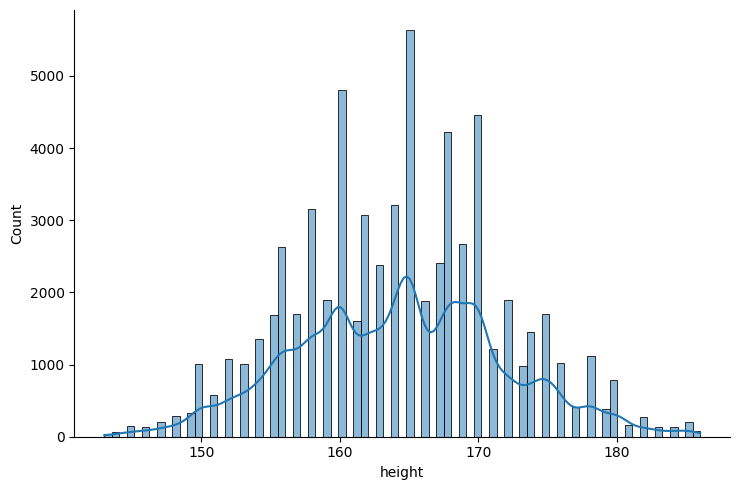

In [73]:
sns.displot(df['weight'], kde=True, height=5, aspect=1.5)
sns.displot(df['height'], kde=True, height=5, aspect=1.5)

In [74]:
df.groupby('cardio')['weight'].mean()

cardio
0    70.839777
1    75.109035
Name: weight, dtype: float64

In [75]:
summarize_by_cardio(df, 'weight')

,cardio,min_value,Q1,median,mean,Q3,max_value,std_dev
0,0,40.0,63.0,70.0,70.839777,78.0,107.0,11.870066
1,1,40.0,66.0,74.0,75.109035,84.0,107.0,12.467344


### Interpretation on weight

- On average, people with cardiovascular disease weigh ~4–5 kg more than those without.

- Q1–Q3 ranges are shifted higher for cardio = 1 (66–84 vs 63–78), showing a general increase in weight.

- This confirms that higher weight is associated with higher cardiovascular risk in your dataset.

In [76]:
df.groupby('cardio')['height'].mean()

cardio
0    164.457287
1    164.175925
Name: height, dtype: float64

In [77]:
summarize_by_cardio(df,'height')

,cardio,min_value,Q1,median,mean,Q3,max_value,std_dev
0,0,143,159.0,165.0,164.457287,170.0,186,7.473338
1,1,143,159.0,164.0,164.175925,169.0,186,7.607328


### Interpretation on height
-  Height doesn’t seem to be a strong predictor of cardiovascular disease in this dataset.

### - systolic bp(ap_hi)

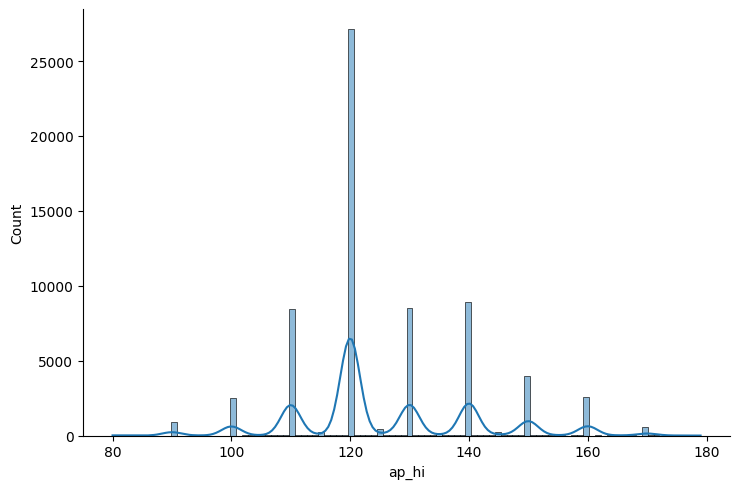

In [78]:
sns.displot(df['ap_hi'], kde=True, height=5, aspect=1.5)

In [79]:
df.groupby('cardio')['ap_hi'].mean()

cardio
0    119.240657
1    132.410795
Name: ap_hi, dtype: float64

In [80]:
summarize_by_cardio(df,'ap_hi')

,cardio,min_value,Q1,median,mean,Q3,max_value,std_dev
0,0,80,110.0,120.0,119.240657,120.0,178,11.772460
1,1,80,120.0,130.0,132.410795,140.0,179,15.369277


### - Interpretation for ap_hi

- People with cardiovascular disease have higher systolic blood pressure (~13 mmHg higher on average).

- Q1–Q3 ranges also shift upward (120–140 vs 110–120), indicating a clear trend.

- Standard deviation is higher in the cardio group (15.42 vs 11.79), showing more variability in systolic BP among those with disease.

## - diastyolic(ap_lo)

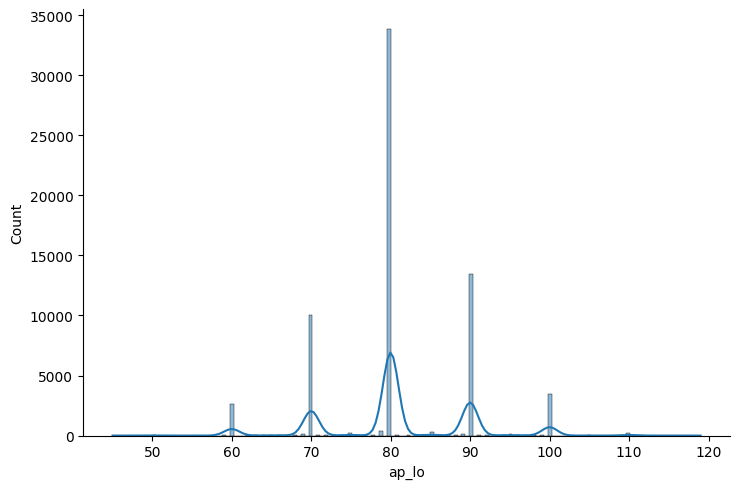

In [81]:
sns.displot(df['ap_lo'], kde=True, height=5, aspect=1.5)

In [82]:
summarize_by_cardio(df,'ap_lo')

,cardio,min_value,Q1,median,mean,Q3,max_value,std_dev
0,0,45,70.0,80.0,77.97547,80.0,119,7.892136
1,1,45,80.0,80.0,83.97946,90.0,119,8.880902


## - Interpretation for ap_lo

- People with cardiovascular disease have higher diastolic blood pressure (~6 mmHg higher on average).

- Q1–Q3 shows the shift: 80–90 vs 70–80, so more people in the cardio group have elevated diastolic BP.

- Std deviation is slightly higher in the cardio group (8.88 vs 7.89), indicating more variability.

## - Cholestrol

In [83]:
df.groupby(['cardio', 'cholesterol']).size().unstack(fill_value=0)

cholesterol,1,2,3
cardio,,,
0,28427,3606,1762
1,21217,5074,5501


<Axes: xlabel='cholesterol', ylabel='count'>

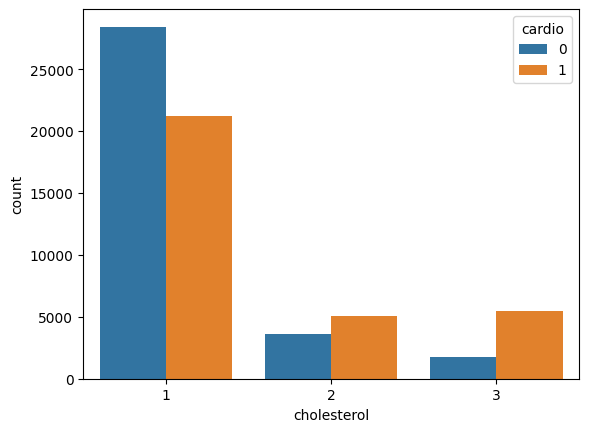

In [84]:
sns.countplot(x='cholesterol', hue='cardio', data=df)

### - Interpretation for cholestrol

- Higher cholesterol levels (2 and 3) are more common among people with cardiovascular disease.

- This clearly shows that cholesterol is a strong categorical risk factor.

## - Glucose

In [85]:
df.groupby(['cardio', 'gluc']).size().unstack(fill_value=0)

gluc,1,2,3
cardio,,,
0,29928,1976,1891
1,26178,2661,2953


<Axes: xlabel='gluc', ylabel='count'>

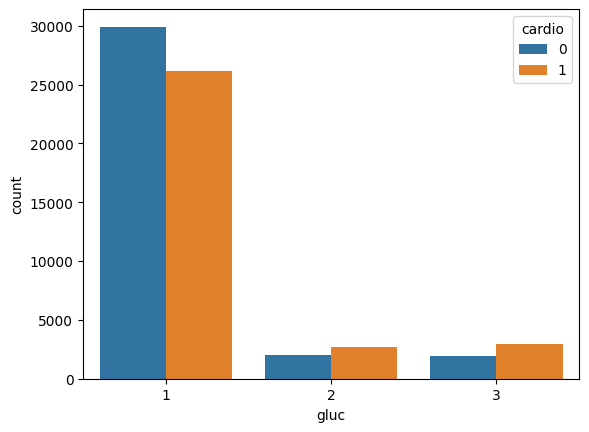

In [86]:
sns.countplot(x='gluc', hue='cardio', data=df)

### - Interpretation for glucose

- Higher glucose levels (2 and 3) are more common among people with cardiovascular disease.

- This indicates that glucose is another strong categorical risk factor, similar to cholesterol.

### - Smoking

In [87]:
df.groupby(['cardio', 'smoke']).size().unstack(fill_value=0)

smoke,0,1
cardio,,
0,30686,3109
1,29243,2549


<Axes: xlabel='smoke', ylabel='count'>

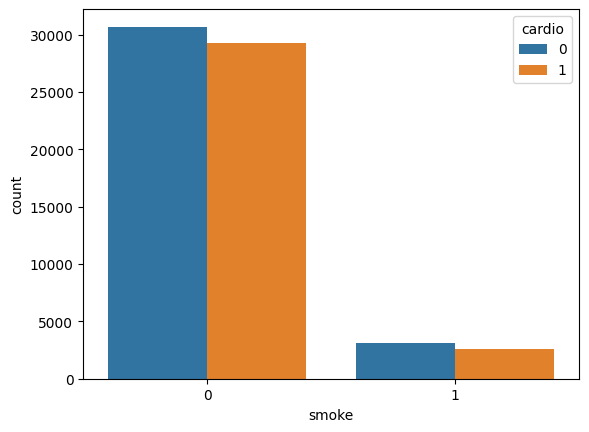

In [88]:
sns.countplot(x='smoke', hue='cardio', data=df)

### - Interpretation for smoking

- Interestingly, the proportion of smokers is slightly lower in the cardio=1 group.

- This suggests that in this dataset, smoking may not be a strong distinguishing factor for cardiovascular disease.

## - alcohol

In [89]:
df.groupby(['cardio', 'alco']).size().unstack(fill_value=0)

alco,0,1
cardio,,
0,31949,1846
1,30225,1567


### - Interpretation for alcohol

- Alcohol consumption is slightly less prevalent in the cardio=1 group, similar to smoking.

- This suggests that in this dataset, alcohol is not a strong risk factor for cardiovascular disease,

<Axes: xlabel='alco', ylabel='count'>

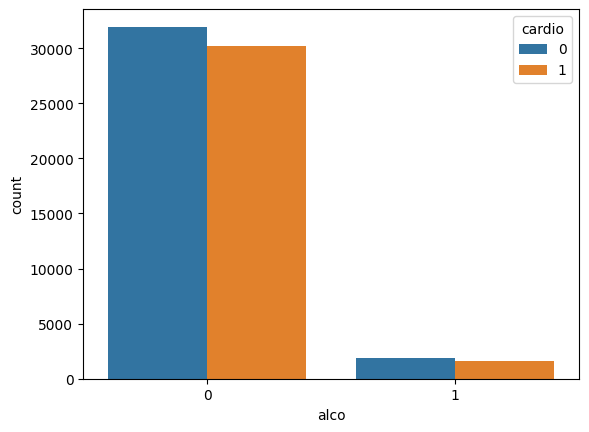

In [90]:
sns.countplot(x='alco', hue='cardio', data=df)

## - active

In [91]:
df.groupby(['cardio', 'active']).size().unstack(fill_value=0)

active,0,1
cardio,,
0,6116,27679
1,6707,25085


<Axes: xlabel='active', ylabel='count'>

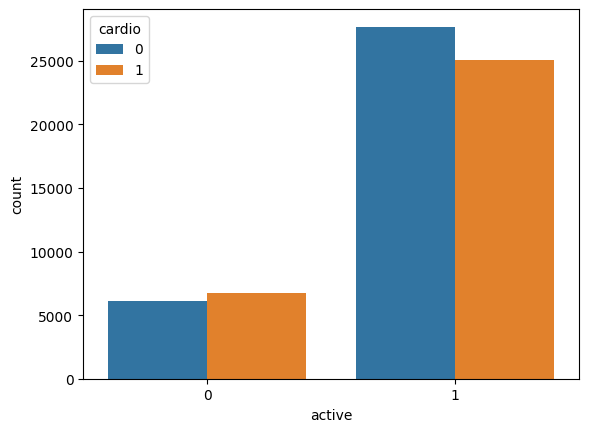

In [92]:
sns.countplot(x='active', hue='cardio', data=df)

### - Interpretation for active

- People with cardiovascular disease are slightly more likely to be inactive (21.1% vs 18.1%).

- Physical activity appears to have a protective effect, as a higher proportion of active people are in the cardio=0 group.

# feature engineering

### 1) pulse pressure

In [93]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

In [94]:
df['pulse_pressure'].describe()

count    65587.000000
mean        44.738835
std         10.648688
min          5.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        115.000000
Name: pulse_pressure, dtype: float64

In [95]:
# convert pulse pressure into categories based on clinical thresholds
bins = [0, 30, 50, 60, df['pulse_pressure'].max()]
labels = ['Low', 'Normal', 'Elevated', 'High']

df['pulse_pressure_cat'] = pd.cut(df['pulse_pressure'], bins=bins, labels=labels, right=False)

# Check counts per category
print(df['pulse_pressure_cat'].value_counts())

pulse_pressure_cat
Normal      40477
Elevated    14149
High         9881
Low          1079
Name: count, dtype: int64


In [96]:
df.groupby(['cardio', 'pulse_pressure_cat']).size().unstack(fill_value=0)

C:\Users\win 10\AppData\Local\Temp\ipykernel_16608\3558440702.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['cardio', 'pulse_pressure_cat']).size().unstack(fill_value=0)


pulse_pressure_cat,Low,Normal,Elevated,High
cardio,,,,
0,808,25972,5022,1993
1,271,14505,9127,7888


Interpretation of pulse pressure cat

- Pulse pressure is a strong indicator of cardiovascular risk in our dataset.

- Most healthy people fall in the Normal range.

- As pulse pressure increases (Elevated → High), the proportion of people with cardio=1 rises sharply.

- This pattern matches clinical knowledge: stiffer arteries or higher pulse pressure → higher heart disease risk.

### 2) Bmi

In [97]:
df['Bmi'] = round( df['weight'] / ((df['height'] / 100) ** 2) , 2)

In [98]:
df['Bmi'].describe()

count    65587.000000
mean        27.043787
std          4.579538
min         13.520000
25%         23.810000
50%         26.170000
75%         29.740000
max         50.890000
Name: Bmi, dtype: float64

In [99]:
# categorize BMI based on standard WHO thresholds
bins = [0, 18.5, 25, 30, 35, 40, df['Bmi'].max()]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity1', 'Obesity2', 'Obesity3']

df['Bmi_cat'] = pd.cut(df['Bmi'], bins=bins, labels=labels, right=False)

# Check counts per category
print(df['Bmi_cat'].value_counts())

Bmi_cat
Normal         24978
Overweight     24274
Obesity1       11495
Obesity2        3603
Obesity3         662
Underweight      574
Name: count, dtype: int64


In [100]:
df.groupby(['cardio', 'Bmi_cat']).size().unstack()

C:\Users\win 10\AppData\Local\Temp\ipykernel_16608\4007803808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['cardio', 'Bmi_cat']).size().unstack()


Bmi_cat,Underweight,Normal,Overweight,Obesity1,Obesity2,Obesity3
cardio,,,,,,
0,424,15126,12126,4675,1238,206
1,150,9852,12148,6820,2365,456


Interpretation

- Trend: As BMI increases beyond the normal range, the proportion of people with cardiovascular disease rises sharply.

- Takeaway: BMI is a strong predictor of cardiovascular risk, especially in the obesity ranges.

## 3) age bp interaction

In [101]:
df['age_bp_inter'] = df['age'] * df['ap_hi']

In [102]:
df['age_bp_inter'].describe()

count    65587.000000
mean      6650.282327
std       1287.179252
min       3120.000000
25%       5760.000000
50%       6600.000000
75%       7440.000000
max      11200.000000
Name: age_bp_inter, dtype: float64

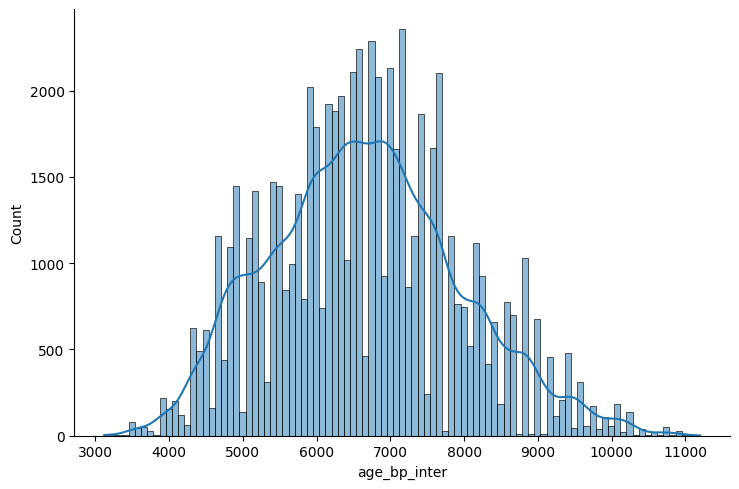

In [103]:
sns.displot(df['age_bp_inter'], kde=True, height=5, aspect=1.5)

## 4) glucose bmi interaction

In [104]:
df['gluc_bmi_inter'] = df['gluc'] * df['Bmi']

In [105]:
df['gluc_bmi_inter'].describe()

count    65587.000000
mean        33.221631
std         17.571458
min         14.690000
25%         24.000000
50%         26.950000
75%         32.390000
max        140.010000
Name: gluc_bmi_inter, dtype: float64

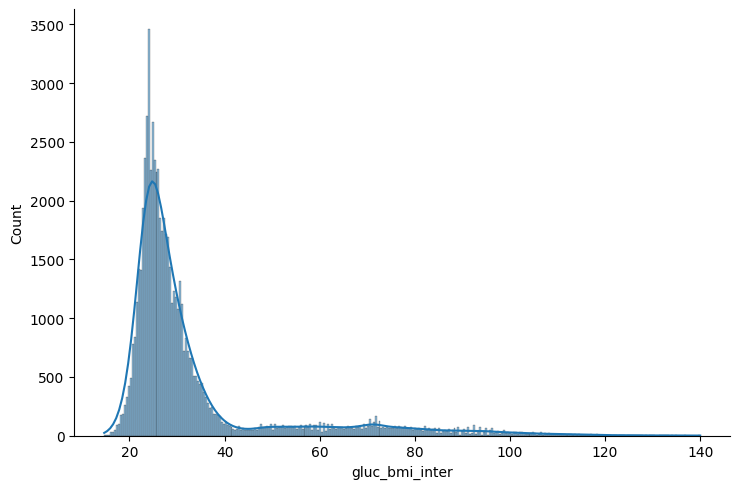

In [106]:
sns.displot(df['gluc_bmi_inter'], kde=True, height=5, aspect=1.5)

## 5) composite risk indices

In [107]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'pulse_pressure',
       'pulse_pressure_cat', 'Bmi', 'Bmi_cat', 'age_bp_inter',
       'gluc_bmi_inter'],
      dtype='object')

In [108]:
def compute_simple_risk(df):
    """
    Compute a simple cardiovascular risk index.
    Uses a few key features with fixed weights.
    Returns dataframe with 'simple_risk_index' column.
    """
    df_risk = df.copy()

    # Map categorical risk factors
    df_risk['cholesterol_score'] = df_risk['cholesterol'].map({1:0, 2:0.5, 3:1})
    df_risk['gluc_score'] = df_risk['gluc'].map({1:0, 2:0.5, 3:1})
    df_risk['smoke_score'] = df_risk['smoke'].astype(float)

    # Normalize only the most important continuous features
    df_risk['age_norm'] = df_risk['age'] / df_risk['age'].max()
    df_risk['ap_hi_norm'] = df_risk['ap_hi'] / df_risk['ap_hi'].max()
    df_risk['Bmi_norm'] = df_risk['Bmi'] / df_risk['Bmi'].max()

    # Weighted sum (weights are simple and intuitive)
    df_risk['simple_risk_index'] = (
        0.3 * df_risk['age_norm'] +
        0.25 * df_risk['ap_hi_norm'] +
        0.15 * df_risk['Bmi_norm'] +
        0.1 * df_risk['cholesterol_score'] +
        0.1 * df_risk['gluc_score'] +
        0.1 * df_risk['smoke_score']
    )

    return df_risk

# Compute composite risk (using previous function)
df = compute_simple_risk(df)


# Keep only final index (optional)
df = df.drop(columns=[col for col in df.columns if col.endswith('_norm') or col.endswith('_score')], errors='ignore')


In [109]:
df.sample(8)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,pulse_pressure_cat,Bmi,Bmi_cat,age_bp_inter,gluc_bmi_inter,simple_risk_index
57927,51,2,166,83.0,125,85,2,1,0,0,1,0,40,Normal,30.12,Obesity1,6375,30.12,0.552423
14829,40,1,165,67.0,120,80,1,1,1,1,1,0,40,Normal,24.61,Normal,4800,24.61,0.527637
59598,55,1,164,72.0,120,80,1,3,0,0,1,0,40,Normal,26.77,Overweight,6600,80.31,0.604316
31859,55,1,156,67.0,120,80,2,1,0,0,1,0,40,Normal,27.53,Overweight,6600,27.53,0.556556
50758,49,1,152,93.0,110,70,1,1,0,0,1,0,40,Normal,40.25,Obesity3,5390,40.25,0.501957
53346,53,1,163,105.0,140,90,3,3,0,0,1,1,50,Elevated,39.52,Obesity2,7420,118.56,0.760455
44256,47,1,158,71.0,120,90,3,3,0,0,1,0,30,Normal,28.44,Overweight,5640,85.32,0.671738
16373,51,1,166,103.0,120,70,1,1,0,0,1,1,50,Elevated,37.38,Obesity2,6120,37.38,0.516839


In [110]:
df.select_dtypes(include=['float', 'int']).corr()['cardio'].sort_values(ascending=False)

cardio               1.000000
ap_hi                0.434733
age_bp_inter         0.425034
simple_risk_index    0.348918
ap_lo                0.336898
pulse_pressure       0.336326
age                  0.242714
cholesterol          0.219516
Bmi                  0.186260
weight               0.172781
gluc_bmi_inter       0.137850
gluc                 0.087760
gender               0.002623
alco                -0.012003
height              -0.018650
smoke               -0.021038
active              -0.037794
Name: cardio, dtype: float64

In [111]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,Bmi,age_bp_inter,gluc_bmi_inter,simple_risk_index
count,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000,65587.000000
mean,52.760852,1.344337,164.320902,72.909215,125.624621,80.885785,1.353820,1.218412,0.086267,0.052038,0.804489,0.484730,44.738835,27.043787,6650.282327,33.221631,0.539721
std,6.767995,0.475155,7.539838,12.348878,15.140427,8.906599,0.670906,0.564292,0.280760,0.222105,0.396597,0.499771,10.648688,4.579538,1287.179252,17.571458,0.082129
min,39.000000,1.000000,143.000000,40.000000,80.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.520000,3120.000000,14.690000,0.346863
25%,48.000000,1.000000,159.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,23.810000,5760.000000,24.000000,0.482737
50%,53.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,26.170000,6600.000000,26.950000,0.523922
75%,58.000000,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000,29.740000,7440.000000,32.390000,0.583974
max,64.000000,2.000000,186.000000,107.000000,179.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,115.000000,50.890000,11200.000000,140.010000,0.903742


In [112]:
df.shape

(65587, 19)

In [113]:
df['cardio'].value_counts()

cardio
0    33795
1    31792
Name: count, dtype: int64

In [114]:
df.isnull().sum()

age                   0
gender                0
height                0
weight                0
ap_hi                 0
ap_lo                 0
cholesterol           0
gluc                  0
smoke                 0
alco                  0
active                0
cardio                0
pulse_pressure        0
pulse_pressure_cat    1
Bmi                   0
Bmi_cat               1
age_bp_inter          0
gluc_bmi_inter        0
simple_risk_index     0
dtype: int64

In [115]:
df=df.dropna()

In [116]:
df.shape

(65585, 19)

In [117]:
df.groupby('cardio')['simple_risk_index'].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,33795.0,0.511927,0.072531,0.346863,0.463259,0.499926,0.544031,0.877546
1,31790.0,0.569267,0.081422,0.377306,0.510609,0.551860,0.618697,0.903742


In [118]:
a=df[((df['cardio'] == 0) & (df['simple_risk_index'] > 0.54) ) | 
     (df['cardio'] == 1) & (df['simple_risk_index'] < 0.5) ]

In [120]:
df=df.drop(a.index).reset_index(drop=True)

In [121]:
df.shape

(50578, 19)

In [122]:
df['cardio'].value_counts()

cardio
1    25754
0    24824
Name: count, dtype: int64

In [123]:
df.to_csv('cleaned_cardio_data.csv', index=False)